In [ ]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [12]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [13]:
char_params = np.array([-111.1574, 3.9705, 0.0362, -7.1958, 3.0419, 1.2430, 0.1276, 1.1034, 1.4281])
methane_params = np.array([16.5264, 0.4982, -0.0304, 0.1739, 0.2148, -0.1864, -0.1186, -0.2192, -0.2552])

def char(ER, MC, T, C, H, O, ash):
    a = lambda i: char_params[i]
    return np.exp(a(0) + a(1)*ER + a(2)*MC + a(3)*((10**(-3))*T) + a(4)*((10**(-3))*T)**2 + a(5)*C + a(6)*H + a(7)*O +a(8)*ash)

def met(ER, MC, T, C, H, O, ash):
    b = lambda i: methane_params[i]
    return np.exp(b(0) + b(1)*ER + b(2)*MC + b(3)*((10**(-3))*T) + b(4)*((10**(-3))*T)**2 + b(5)*C + b(6)*H + b(7)*O +b(8)*ash)

In [14]:
df = pd.read_excel('aydin.xlsx')

In [15]:
species = ['H2', 'CO', 'CO2', 'CH4', 'N2']
results0 = np.zeros((len(species), 8))
results1 = np.zeros_like(results0)
results2 = np.zeros_like(results0)
results3 = np.zeros_like(results0)
ult1 = [50.7, 6.9, 42.4, 0.3, 0, 0]
ash1 = 0.0039
hhv1 = 18.86
for i in range(8):
    er = df['ER'][i]
    t = df['T'][i]
    h2 = df['H2'][i]
    co = df['CO'][i]
    co2 = df['CO2'][i]
    ch4 = df['CH4'][i]
    n2 = df['N2'][i]
    mc = df['MC'][i]
    fuel = fs.create_fuel_stream(1, ult1, ash1, mc/100, hhv1)
    air = fs.create_air_from_ER(fuel, er)
    out0 = gs.gasify_nonisot(fuel, air, heatLossFraction=0)
    char1 = char(er, mc, out0.T, ult1[0], ult1[1], ult1[2], ash1*100)
    met1 = met(er, mc, out0.T, ult1[0], ult1[1], ult1[2], ash1*100)
    out1 = gs.gasify_nonisot(fuel, air, charFormation=char1, directMethaneConv=0, heatLossFraction=0)
    out2 = gs.gasify_nonisot(fuel, air, charFormation=0, directMethaneConv=met1, heatLossFraction=0)
    out3 = gs.gasify_nonisot(fuel, air, charFormation=char1, directMethaneConv=met1, heatLossFraction=0)
    for j, sp in enumerate(species):
        results0[j][i] = 100*out0.get_syngas_fraction(sp)
        results1[j][i] = 100*out1.get_syngas_fraction(sp)
        results2[j][i] = 100*out2.get_syngas_fraction(sp)
        results3[j][i] = 100*out3.get_syngas_fraction(sp)


-8.590998216416676 0.0
-8.590998216416676 0.0
-8.590998216416676 0.0
-8.590998216416676 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216333475 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216400035 0.0
-8.590998216400035 0.0
-8.590998216400035 0.0
-8.590998216400035 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0
-8.590998216350116 0.0


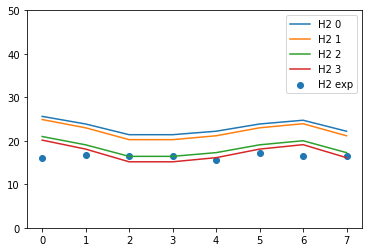

In [16]:
plt.plot(range(8), results0[0], label='H2 0')
plt.plot(range(8), results1[0], label='H2 1')
plt.plot(range(8), results2[0], label='H2 2')
plt.plot(range(8), results3[0], label='H2 3')
plt.scatter(range(8), df.iloc[0:8]['H2'], label='H2 exp')
plt.ylim(0,50)
plt.legend()
plt.show()

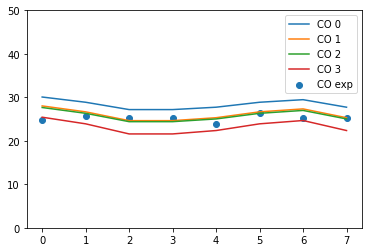

In [17]:
plt.plot(range(8), results0[1], label='CO 0')
plt.plot(range(8), results1[1], label='CO 1')
plt.plot(range(8), results2[1], label='CO 2')
plt.plot(range(8), results3[1], label='CO 3')
plt.scatter(range(8), df.iloc[0:8]['CO'], label='CO exp')
plt.ylim(0,50)
plt.legend()
plt.show()

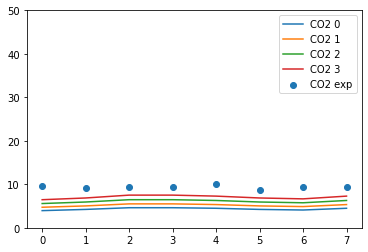

In [18]:
plt.plot(range(8), results0[2], label='CO2 0')
plt.plot(range(8), results1[2], label='CO2 1')
plt.plot(range(8), results2[2], label='CO2 2')
plt.plot(range(8), results3[2], label='CO2 3')
plt.scatter(range(8), df.iloc[0:8]['CO2'], label='CO2 exp')
plt.ylim(0,50)
plt.legend()
plt.show()

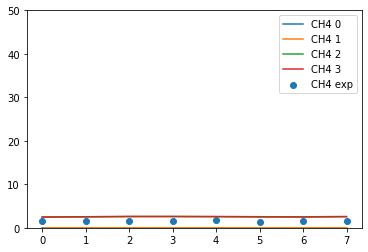

In [19]:
plt.plot(range(8), results0[3], label='CH4 0')
plt.plot(range(8), results1[3], label='CH4 1')
plt.plot(range(8), results2[3], label='CH4 2')
plt.plot(range(8), results3[3], label='CH4 3')
plt.scatter(range(8), df.iloc[0:8]['CH4'], label='CH4 exp')
plt.ylim(0,50)
plt.legend()
plt.show()

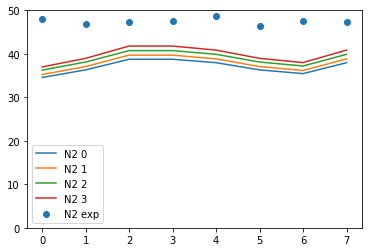

In [20]:
plt.plot(range(8), results0[4], label='N2 0')
plt.plot(range(8), results1[4], label='N2 1')
plt.plot(range(8), results2[4], label='N2 2')
plt.plot(range(8), results3[4], label='N2 3')
plt.scatter(range(8), df.iloc[0:8]['N2'], label='N2 exp')
plt.ylim(0,50)
plt.legend()
plt.show()

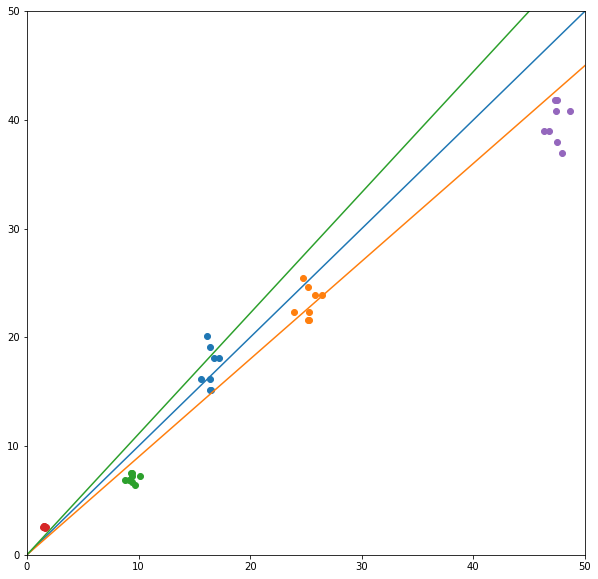

In [21]:
fig1 = plt.figure(figsize=(10,10))
plt.scatter(df.iloc[0:8]['H2'], results3[0])
plt.scatter(df.iloc[0:8]['CO'], results3[1])
plt.scatter(df.iloc[0:8]['CO2'], results3[2])
plt.scatter(df.iloc[0:8]['CH4'], results3[3])
plt.scatter(df.iloc[0:8]['N2'], results3[4])
plt.plot([0,50],[0,50])
plt.plot([0,50],[0,45])
plt.plot([0,45],[0,50])
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

In [22]:
ER = 0.27
MC = 0.075
species = ['H2', 'CO', 'CO2', 'CH4', 'N2']
exp = [16.8, 25.8, 9.1, 1.5, 46.8]

barrioWood = fs.create_fuel_stream(1, [50.70, 6.90, 42.40, 0.30, 0.00, 0.00], 0.0039, MC, 18.86)
air = fs.create_air_from_ER(barrioWood, ER)
outlet0 = gs.gasify_nonisot(barrioWood, air, charFormation=0, directMethaneConv=0)
Teq = outlet0.T
char1 = char(ER, MC, Teq, 50.7, 6.90, 42.40, 0.39)
met1 = met(ER, MC, Teq, 50.7, 6.90, 42.40, 0.39)
print(char1, met1)
outlet1 = gs.gasify_nonisot(barrioWood, air, charFormation=char1, directMethaneConv=0)
outlet2 = gs.gasify_nonisot(barrioWood, air, charFormation=0, directMethaneConv=met1)
outlet3 = gs.gasify_nonisot(barrioWood, air, charFormation=char1, directMethaneConv=met1)

for i, sp in enumerate(species):
    print(100*outlet3.get_syngas_fraction(sp, water=False, nitrogen=True))
print(outlet0.T, outlet3.T)
RMSE_0 = (sum([(exp[i] - 100*outlet0.get_syngas_fraction(sp, water=False, nitrogen=True))**2 for i, sp in enumerate(species)]) / len(species))**(1/2)
RMSE_1 = (sum([(exp[i] - 100*outlet1.get_syngas_fraction(sp, water=False, nitrogen=True))**2 for i, sp in enumerate(species)]) / len(species))**(1/2)
RMSE_2 = (sum([(exp[i] - 100*outlet2.get_syngas_fraction(sp, water=False, nitrogen=True))**2 for i, sp in enumerate(species)]) / len(species))**(1/2)
RMSE_3 = (sum([(exp[i] - 100*outlet3.get_syngas_fraction(sp, water=False, nitrogen=True))**2 for i, sp in enumerate(species)]) / len(species))**(1/2)
print(RMSE_0, RMSE_1, RMSE_2, RMSE_3)
print(100*outlet3.get_syngas_fraction('CH4', water=False, nitrogen=True))
# outlet2 = gs.gasify_nonisot2(barrioWood, air, charFormation=char1, directMethaneConv=met1)
# print(outlet2.T)
# print(outlet2.get_syngas_fraction('H2', water=False, nitrogen=True))
# print(outlet2.get_syngas_fraction('CO', water=False, nitrogen=True))
# print(outlet2.get_syngas_fraction('CO2', water=False, nitrogen=True))
# print(outlet2.get_syngas_fraction('CH4', water=False, nitrogen=True))
# print(outlet2.get_syngas_fraction('N2', water=False, nitrogen=True))

-8.590998216383396 0.0
0.04736461979829722 0.08982715674014347
-8.590998216383396 0.0
-8.590998216383396 0.0
-8.590998216383396 0.0
18.781254244492537
26.05928569366626
7.893473593643492
3.535229827259486
43.17776861347578
1306.6013594753942 1297.2668893001076
6.136925909460035 5.414137249707376 2.91915465680778 2.1312448985878225
3.535229827259486
